In [1]:
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, DAOStarFinder
import astropy.io.fits as pf
import numpy as np
import seaborn as sns
sns.set()
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [21]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid2\V')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file in files:
    i = pf.open(file)
    image = pf.getdata(file)
    print(file,i[0].header['DATE-OBS'],i[0].header['OBJECT'],np.shape(image))

ucdF_0008.fits 2020-03-13T21:46:40.920 ceph2V (2056, 2048)
ucdF_0009.fits 2020-03-13T21:47:28.998 ceph2V (2056, 2048)
ucdM_0010.fits 2020-03-09T21:06:48.911 ceph2V (2056, 2048)
ucdM_0037.fits 2020-03-09T23:12:10.234 ceph2V (2056, 2048)
ucdS_0017.fits 2020-03-14T21:30:36.177 ceph2V (2056, 2048)
ucdTh_0009.fits 2020-03-12T19:03:32.236 Ceph2V (2056, 2048)
ucdTh_0010.fits 2020-03-12T19:04:06.892 Ceph2V (2056, 2048)
ucdTh_0011.fits 2020-03-12T19:04:51.173 Ceph2V (2056, 2048)
ucdTh_0012.fits 2020-03-12T19:05:24.282 Ceph2V (2056, 2048)
ucdTh_0013.fits 2020-03-12T19:06:06.703 Ceph2V (2056, 2048)
ucdT_0040.fits 2020-03-10T19:14:57.428 ceph2V (4112, 4096)
ucdT_0041.fits 2020-03-10T19:16:02.302 ceph2V (4112, 4096)
ucdT_0256.fits 2020-03-10T23:50:12.442 ceph2V (4112, 4096)
ucdW_0039.fits 2020-03-11T19:16:07.251 ceph2V (2056, 2048)
ucdW_0040.fits 2020-03-11T19:17:09.141 ceph2V (2056, 2048)
ucdW_0041.fits 2020-03-11T19:17:42.079 ceph2V (2056, 2048)
ucdW_0045.fits 2020-03-11T19:21:39.249 ceph2V (2056

['reduceducdF_0008.fits', 'reduceducdF_0009.fits', 'reduceducdM_0010.fits', 'reduceducdM_0037.fits', 'reduceducdS_0017.fits', 'reduceducdTh_0009.fits', 'reduceducdTh_0010.fits', 'reduceducdTh_0011.fits', 'reduceducdTh_0012.fits', 'reduceducdTh_0013.fits', 'reduceducdW_0039.fits', 'reduceducdW_0041.fits', 'reduceducdW_0045.fits', 'reduceducdW_0048.fits', 'reduceducdW_0261.fits']
The best aperture for reduceducdF_0008.fits is 3
402.0499128768394 376.1519997677727 802.3212828646538
The best aperture for reduceducdF_0009.fits is 4
401.8176724741236 377.082944764681 864.4879280487215
The best aperture for reduceducdM_0010.fits is 5
401.37891170647725 378.8880825585578 828.4641135125398
The best aperture for reduceducdM_0037.fits is 3
400.816143522648 377.0145951289003 464.47939759649944
The best aperture for reduceducdS_0017.fits is 10
401.90376162735134 381.46515724613306 90.94431585164376
The best aperture for reduceducdTh_0009.fits is 3
400.51903763526883 376.7661462660458 1189.777326473

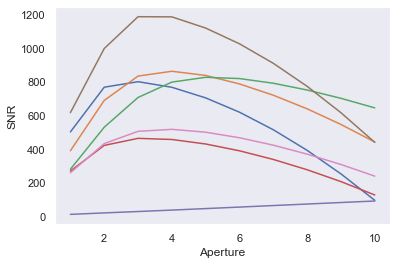

In [4]:
######################Visual 750 750#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
print(files)
images = []
images.append(images1[0]+images1[1])
images.extend([images1[2],images1[3],images1[4]])
images.append(images1[7])
images.append(images1[10]+images1[11]+images1[12]+images1[13])
images.append(images1[14])
#x = [0,-1,2,-10,0,-172,-173,-174,-172,-174,25,23,23,23,-7]
#y = [0,-2,6,-24,3,26,26,26,26,26,24,25,24,26,-30]
x = [0,2,-10,0,173,23,-7]
y = [0,6,-24,3,26,25,-30]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 402
yref = 376
for image, file in zip(rolledimages,files):
    mean, median, std = sigma_clipped_stats(image, sigma=2)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    positions = []
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            positions.append((i,j))
    if not positions:
        positions = [(xref,yref)]
    xref = positions[0][0]
    yref = positions[0][1]
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",file,"is",bestaperture)
            print(xref,yref,k)
    
            #print(np.mean(image))
    #print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
#plt.savefig("apertures.png")

In [34]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced')
file1 = 'reduceducdW_0039.fits'
image1 = pf.getdata(file1)
file2 = 'reduceducdW_0041.fits'
image2 = pf.getdata(file2)
file3 = 'reduceducdW_0045.fits'
image3 = pf.getdata(file3)
file4 = 'reduceducdW_0048.fits'
image4 = pf.getdata(file4)
image = image2+image1+image3+image4
xref = 379
yref = 352
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
positions = []
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
331,377.51904,351.76615,0.53531703,0.40597836,-0.50203035,49,0,133811.83,13356.412,-10.314224


The best aperture for is 4
379 352 1170.1260915612852


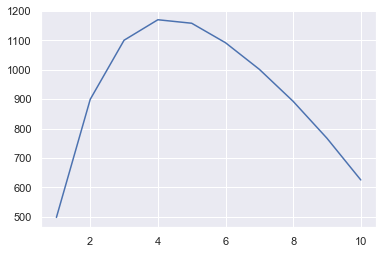

In [38]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced')
file1 = 'reduceducdW_0039.fits'
image1 = pf.getdata(file1)
file2 = 'reduceducdW_0041.fits'
image2 = pf.getdata(file2)
file3 = 'reduceducdW_0045.fits'
image3 = pf.getdata(file3)
file4 = 'reduceducdW_0048.fits'
image4 = pf.getdata(file4)
image = (image2+image1+image3+image4)
xref = 379
yref = 352
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
positions = []
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]
xref = 379
yref = 352
positions.append([xref,yref])
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions[0], r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
     phot_table[col].info.format = '%.8g'
annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
snr = np.array([])
index = 0
for col in phot_table.colnames[3:]:
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1
plt.plot(radii,snr)
bestaperture = 0
for k,l in zip(snr,radii):
    if k == np.max(snr):
        bestaperture = l
        print("The best aperture for is",bestaperture)
        print(xref,yref,k)

The best aperture for is 3
573.28408 350.31501 1029.210957338353


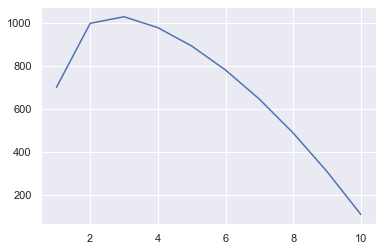

In [20]:
xref = 575
yref = 351
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=4.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
positions = []
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]
xref = 573.28408
yref = 350.31501
positions.append([xref,yref])
radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
apertures = [CircularAperture(positions[0], r=r) for r in radii]
phot_table = aperture_photometry(image, apertures)
for col in phot_table.colnames:
     phot_table[col].info.format = '%.8g'
annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
snr = np.array([])
index = 0
for col in phot_table.colnames[3:]:
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * apertures[index].area
    net_star = phot_table[col] - bkg_total
    snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
    index += 1
plt.plot(radii,snr)
bestaperture = 0
for k,l in zip(snr,radii):
    if k == np.max(snr):
        bestaperture = l
        print("The best aperture for is",bestaperture)
        print(xref,yref,k)

In [52]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced')
file1 = 'reduceducdTh_0013.fits'
file2 = 'reduceducdTh_0012.fits'
image1 = pf.getdata(file1)
image2 = pf.getdata(file2)
image = image1 + image2
xref = 575
yref = 350
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5., threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
positions = []
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
sources[ID]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
198,573.64596,350.1594,0.8337811,-0.10558089,-0.17743055,49,0,28650.872,3964.4148,-8.9954477


In [16]:
sources[ID]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
1105,402.54117,370.95103,0.31600158,-0.32473256,-0.1943345,25,0,5.4078923,1.1831981,-0.18264364
1130,410.16519,376.72165,0.41288093,-0.50390129,-0.27772452,25,0,7.2654602,1.1909844,-0.18976517
1157,398.21155,385.68377,0.88316708,-0.18502373,-0.097872977,25,0,10.846738,1.0293302,-0.031386831
1158,410.68517,386.1585,0.26508759,0.056383642,0.44245822,25,0,5.5860595,1.347137,-0.32352943


In [48]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid2\V')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file in files:
    if file == 'ucdT_0040.fits' or file == 'ucdT_0041.fits' or file == 'ucdT_0256.fits':
        i = pf.open(file)
        print(file,i[0].header['DATE-OBS'])

ucdT_0040.fits 2020-03-10T19:14:57.428
ucdT_0041.fits 2020-03-10T19:16:02.302
ucdT_0256.fits 2020-03-10T23:50:12.442


The best aperture for reduceducdT_0040.fits is 7
746.2354647923443 710.0182458177651 942.4033018649163
The best aperture for reduceducdT_0041.fits is 8
749.8179858558084 707.1402626442556 762.2626243080038
The best aperture for reduceducdT_0256.fits is 10
747.1835393978891 711.1878412469512 910.4010004895082


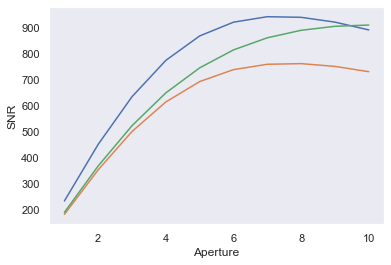

In [49]:
######################Visual 1500 1500#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced\1500 1500 files')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue

x = [0,-1,-67]
y = [0,-2,-122]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 748
yref = 708
for image, file in zip(rolledimages,files):
    mean, median, std = sigma_clipped_stats(image, sigma=2)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    positions = []
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
            positions.append((i,j))
    if not positions:
        positions = [(xref,yref)]
    xref = positions[0][0]
    yref = positions[0][1]
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",file,"is",bestaperture)
            print(xref,yref,k)
    
            #print(np.mean(image))
    #print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
#plt.savefig("apertures.png")

In [50]:
image = rolledimages[2]
mean, median, std = sigma_clipped_stats(image, sigma=2)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
ID = []
for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(i-xref)<10 and -10<(j-yref)<10:
        l = k-1
        ID.append(l)
print(sources[ID])

 id  xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
---- --------- --------- ---------- ... --- --------- --------- ----------
3021 747.18354 711.18784 0.41928481 ...   0 12651.643 351.04905 -6.3634195


In [9]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid2\I')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file in files:
    i = pf.open(file)
    image = pf.getdata(file)
    print(file,i[0].header['DATE-OBS'],np.shape(image),i[0].header['OBJECT'])

ucdF_0013.fits 2020-03-13T21:50:55.262 (2056, 2048) ceph2I
ucdM_0016.fits 2020-03-09T21:13:05.658 (2056, 2048) ceph2I
ucdM_0041.fits 2020-03-09T23:18:56.371 (2056, 2048) ceph2I
ucdS_0020.fits 2020-03-14T21:33:52.660 (2056, 2048) ceph2I
ucdTh_0017.fits 2020-03-12T19:08:40.858 (2056, 2048) Ceph2I
ucdTh_0018.fits 2020-03-12T19:09:11.046 (2056, 2048) Ceph2I
ucdT_0045.fits 2020-03-10T19:21:47.424 (4112, 4096) ceph2I
ucdT_0046.fits 2020-03-10T19:22:45.564 (4112, 4096) ceph2I
ucdT_0047.fits 2020-03-10T19:23:45.689 (4112, 4096) ceph2I
ucdT_0260.fits 2020-03-10T23:57:45.531 (4112, 4096) ceph2I
ucdW_0044.fits 2020-03-11T19:20:26.687 (2056, 2048) ceph2I
ucdW_0265.fits 2020-03-11T23:27:06.299 (2056, 2048) ceph2I


['reduceducdF_0013.fits', 'reduceducdM_0016.fits', 'reduceducdM_0041.fits', 'reduceducdS_0020.fits', 'reduceducdTh_0017.fits', 'reduceducdTh_0018.fits', 'reduceducdW_0044.fits', 'reduceducdW_0265.fits']
The best aperture for 1 is 3
403 376 363.7320581919635
The best aperture for 2 is 3
403 376 676.1345211073302
The best aperture for 3 is 4
403 376 693.7728904703569
The best aperture for 4 is 3
403 376 441.01119028738003
The best aperture for 5 is 3
403 376 404.414735817793
The best aperture for 6 is 3
403 376 453.0585492234571
The best aperture for 7 is 3
403 376 603.3646118689461


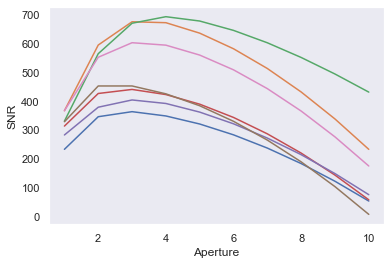

In [8]:
######################Infrared 750 750#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2I Reduced')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
print(files)
images = []  
images.extend([images1[0],images1[1],images1[2],images1[3]])
images.append((images1[4]+images1[5]))
images.append(images1[6])
images.append(images1[7])
        
x = [0,0,-12,0,-177,26,-6]
y = [0,6,-27,0,26,26,-31]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 403
yref = 376
magref = -9.3679137
nos = [1,2,3,4,5,6,7]
for image,no in zip(rolledimages,nos):
    mean, median, std = sigma_clipped_stats(image, sigma=2)
    daofind = DAOStarFinder(fwhm=4.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    for i,j,k,l in zip(sources['xcentroid'],sources['ycentroid'],sources['id'],sources['mag']):
        if -10<(i-xref)<10 and -10<(j-yref)<10 and -2<(magref-l)<2:
            l = k-1
            ID.append(l)
    positions = []
    #x = np.arange(xref-20,xref+20,1)
    index = np.where(np.abs(xref-sources['xcentroid'][ID]) == np.min(np.abs(xref-sources['xcentroid'][ID]))) 
    x = sources['xcentroid'][ID][index]
    y = sources['ycentroid'][ID][index]                                                                               
    positions.append([x,y])
    #print('mag=',sources['mag'][ID][index])                                                                               
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",no,"is",bestaperture)
            print(xref,yref,k)
    
            #print(np.mean(image))
    #print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
#plt.savefig("apertures.png")

In [10]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Cepheid2\I')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
for file in files:
    i = pf.open(file)
    image = pf.getdata(file)
    print(file,i[0].header['DATE-OBS'],np.shape(image))

ucdF_0013.fits 2020-03-13T21:50:55.262 (2056, 2048)
ucdM_0016.fits 2020-03-09T21:13:05.658 (2056, 2048)
ucdM_0041.fits 2020-03-09T23:18:56.371 (2056, 2048)
ucdS_0020.fits 2020-03-14T21:33:52.660 (2056, 2048)
ucdTh_0017.fits 2020-03-12T19:08:40.858 (2056, 2048)
ucdTh_0018.fits 2020-03-12T19:09:11.046 (2056, 2048)
ucdT_0045.fits 2020-03-10T19:21:47.424 (4112, 4096)
ucdT_0046.fits 2020-03-10T19:22:45.564 (4112, 4096)
ucdT_0047.fits 2020-03-10T19:23:45.689 (4112, 4096)
ucdT_0260.fits 2020-03-10T23:57:45.531 (4112, 4096)
ucdW_0044.fits 2020-03-11T19:20:26.687 (2056, 2048)
ucdW_0265.fits 2020-03-11T23:27:06.299 (2056, 2048)


In [52]:
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2I Reduced\1500 1500 files')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
print(files)

['reduceducdT_0045.fits', 'reduceducdT_0046.fits', 'reduceducdT_0047.fits', 'reduceducdT_0260.fits']


The best aperture for 1 is 10
753 710 1156.0646179190041
The best aperture for 2 is 9
753 710 736.7670474381898


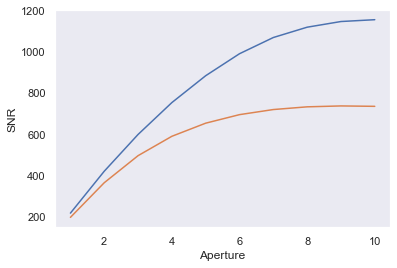

In [60]:
######################Infrared 1500 1500#############################################
directory = os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2I Reduced\1500 1500 files')
images1 = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        image=pf.getdata(file)
        images1.append(image)
        files.append(file)
    else:
        continue
images = []  
images.append((images1[0]+images1[1]+images1[2])/3)
images.append(images1[3])
x = [0,-66]
y = [0,-124]
rolledimages = []
z = 0
for i in images:
    j = np.roll(i,x[z],1)
    k = np.roll(j,y[z],0)
    z+=1
    rolledimages.append(k)

xref = 753
yref = 710

nos = [1,2,3,4,5,6,7]
for image,no in zip(rolledimages,nos):
    mean, median, std = sigma_clipped_stats(image, sigma=2)
    daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
    sources = daofind(image - median)
    for col in sources.colnames: 
        sources[col].info.format = '%.8g'
    ID = []
    for i,j,k in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
        if -10<(i-xref)<10 and -10<(j-yref)<10:
            l = k-1
            ID.append(l)
    positions = []
    #x = np.arange(xref-20,xref+20,1)
    index = np.where(np.abs(xref-sources['xcentroid'][ID]) == np.min(np.abs(xref-sources['xcentroid'][ID]))) 
    x = sources['xcentroid'][ID][index]
    y = sources['ycentroid'][ID][index]                                                                               
    positions.append([x,y])
    #print('mag=',sources['mag'][ID][index])                                                                               
    radii = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    apertures = [CircularAperture(positions[0], r=r) for r in radii]
    phot_table = aperture_photometry(image, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    annulus_aperture = CircularAnnulus(positions[0], r_in=12., r_out=15.)
    snr = np.array([])
    index = 0
    for col in phot_table.colnames[3:]:
        bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
        bkg_total = bkg_mean * apertures[index].area
        net_star = phot_table[col] - bkg_total
        snr = np.append(snr, net_star / np.sqrt(net_star + bkg_total))
        index += 1
    plt.plot(radii,snr)
    bestaperture = 0
    for k,l in zip(snr,radii):
        if k == np.max(snr):
            bestaperture = l
            print("The best aperture for",no,"is",bestaperture)
            print(xref,yref,k)
    
            #print(np.mean(image))
    #print('The SNR is', snr[bestaperture-1])
plt.ylabel("SNR")
plt.xlabel("Aperture")
plt.grid()
#plt.savefig("apertures.png")